## Exploring the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [9]:
df = pd.read_csv("Datasets/daily_min_temp.csv", index_col=0, parse_dates=True)
print("Original dataset shape = ", df.shape)
print("Original dataset")
df.head()

Original dataset shape =  (3650, 1)
Original dataset


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [10]:
temp = df.values
print("The temperature values are:")
temp

The temperature values are:


array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

<AxesSubplot:xlabel='Date'>

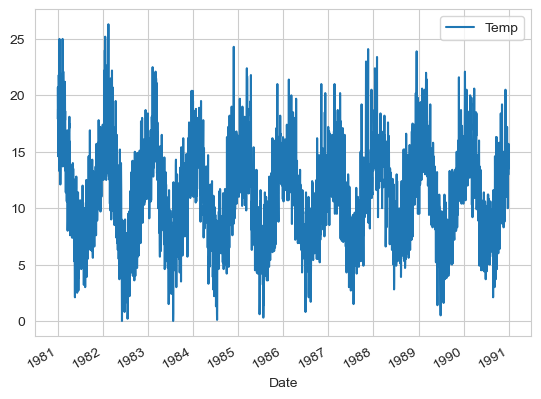

In [11]:
df.plot()

<AxesSubplot:xlabel='Date'>

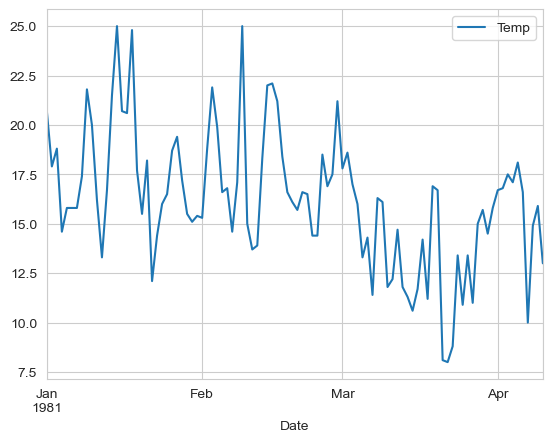

In [13]:
df[0:100].plot()

* As we can see from the above plot we cannot clearly see if the timeseries is stationary or not.
* However we can see that there might be some seosonal repeating patterns when looking at the data from a large scale.
* We know that for an AR model it is important for the timeseries to be stationary.

## Checking for stationarity using Dickey-Fuller test

* To check for the stationarity, we use the dickey-fuller test.
* This test is used to test for a unit root.
* The null hypothesis is that there is a unit root present and the alternative hypothesis is that there isn't.
* If a unit root is present -> the process is <u>NOT</u> stationary.
* It is often used for an AR model.

In [14]:
from statsmodels.tsa.stattools import adfuller

In [16]:
df_test = adfuller(df['Temp'], autolag='AIC')

In [17]:
df_test

(-4.4448049246117005,
 0.0002470826300360988,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [18]:
print('ADF Statistic: %f' % df_test[0])

print('p-value: %f' % df_test[1])

print('Critical Values:')

for key, value in df_test[4].items():
    print('\t%s: %.3f' % (key, value))
if df_test[0] < df_test[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.444805
p-value: 0.000247
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


* As we can see, we compare the ADF statistic value with its critical value as per our wish (here 5%).
* If the test statistic is less than its critical value we reject H0.
* Alternatively we can say that if the value of p is less than 0.05, the timesereis is stationary.

## Partial Autocorrelation function

* We use PACF plot to determine the order of the AR model (p-number of lagged values included in the model).

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

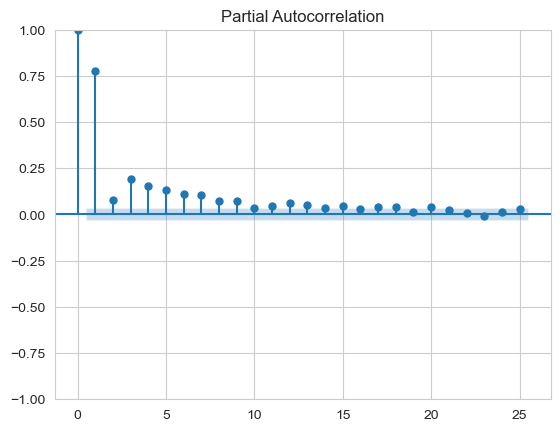

In [22]:
pacf = plot_pacf(df['Temp'], lags=25)

* From the above plot we can see that there is high auto-correlation for the first lagged value.
* Then upto the next 10 values there is a decent auto-correlation.
* So we can select p=10 for our AR model.

## AR model

In [23]:
from statsmodels.tsa.ar_model import AutoReg

* We split the dataset, use the last 7 days for testing and the remaining for training.

In [26]:
train = temp[:len(temp)-7]
test = temp[len(temp)-7:]

In [27]:
ar_model = AutoReg(train, lags=10).fit()

In [29]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Wed, 15 Mar 2023   AIC                          16775.028
Time:                        20:08:50   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

* The lower the value of P>|z|, the better correlated the lagged value was for correlation.

* Now we can make predictions on the testing data

In [30]:
pred = ar_model.predict(start=len(train), end=len(temp)-1, dynamic=False)

The predicted values are:  [11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


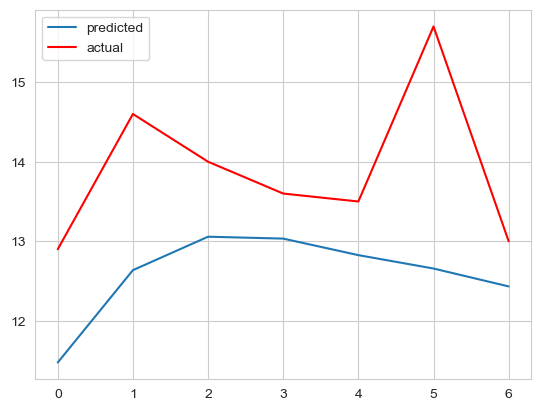

In [34]:
plt.plot(pred, label="predicted")
plt.plot(test, color='red', label="actual")
plt.legend()
print("The predicted values are: " ,pred)

* Now we calculate error using the root mean square metric.

In [36]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, pred))

In [37]:
print("The RMSE = ", rmse)

The RMSE =  1.5638196220860856


* Now we can make future predictions.

In [40]:
pred_future = ar_model.predict(start=len(temp)+1, end=len(temp)+7, dynamic=False)
print("The predicted values of the next week is: " ,pred_future)

The predicted values of the next week is:  [12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]


# Now applying AR model for a different dataset

# Exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
sns.set_style("whitegrid")
data = pd.read_csv('Datasets/Time Series practice dataset/train.csv', index_col=0, parse_dates=True)

In [44]:
data.head()

,store,product,number_sold
Date,,,
2010-01-01,0,0,801
2010-01-02,0,0,810
2010-01-03,0,0,818
2010-01-04,0,0,796
2010-01-05,0,0,808


In [45]:
data = data['number_sold']

In [46]:
data.head()

Date
2010-01-01    801
2010-01-02    810
2010-01-03    818
2010-01-04    796
2010-01-05    808
Name: number_sold, dtype: int64

In [47]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 230090 entries, 2010-01-01 to 2018-12-31
Series name: number_sold
Non-Null Count   Dtype
--------------   -----
230090 non-null  int64
dtypes: int64(1)
memory usage: 3.5 MB


In [48]:
data.describe()

count    230090.000000
mean        780.926107
std         204.096737
min         238.000000
25%         722.000000
50%         835.000000
75%         914.000000
max        1205.000000
Name: number_sold, dtype: float64

In [49]:
sold_count = data.values
sold_count

array([801, 810, 818, ..., 895, 899, 912], dtype=int64)

<AxesSubplot:xlabel='Date'>

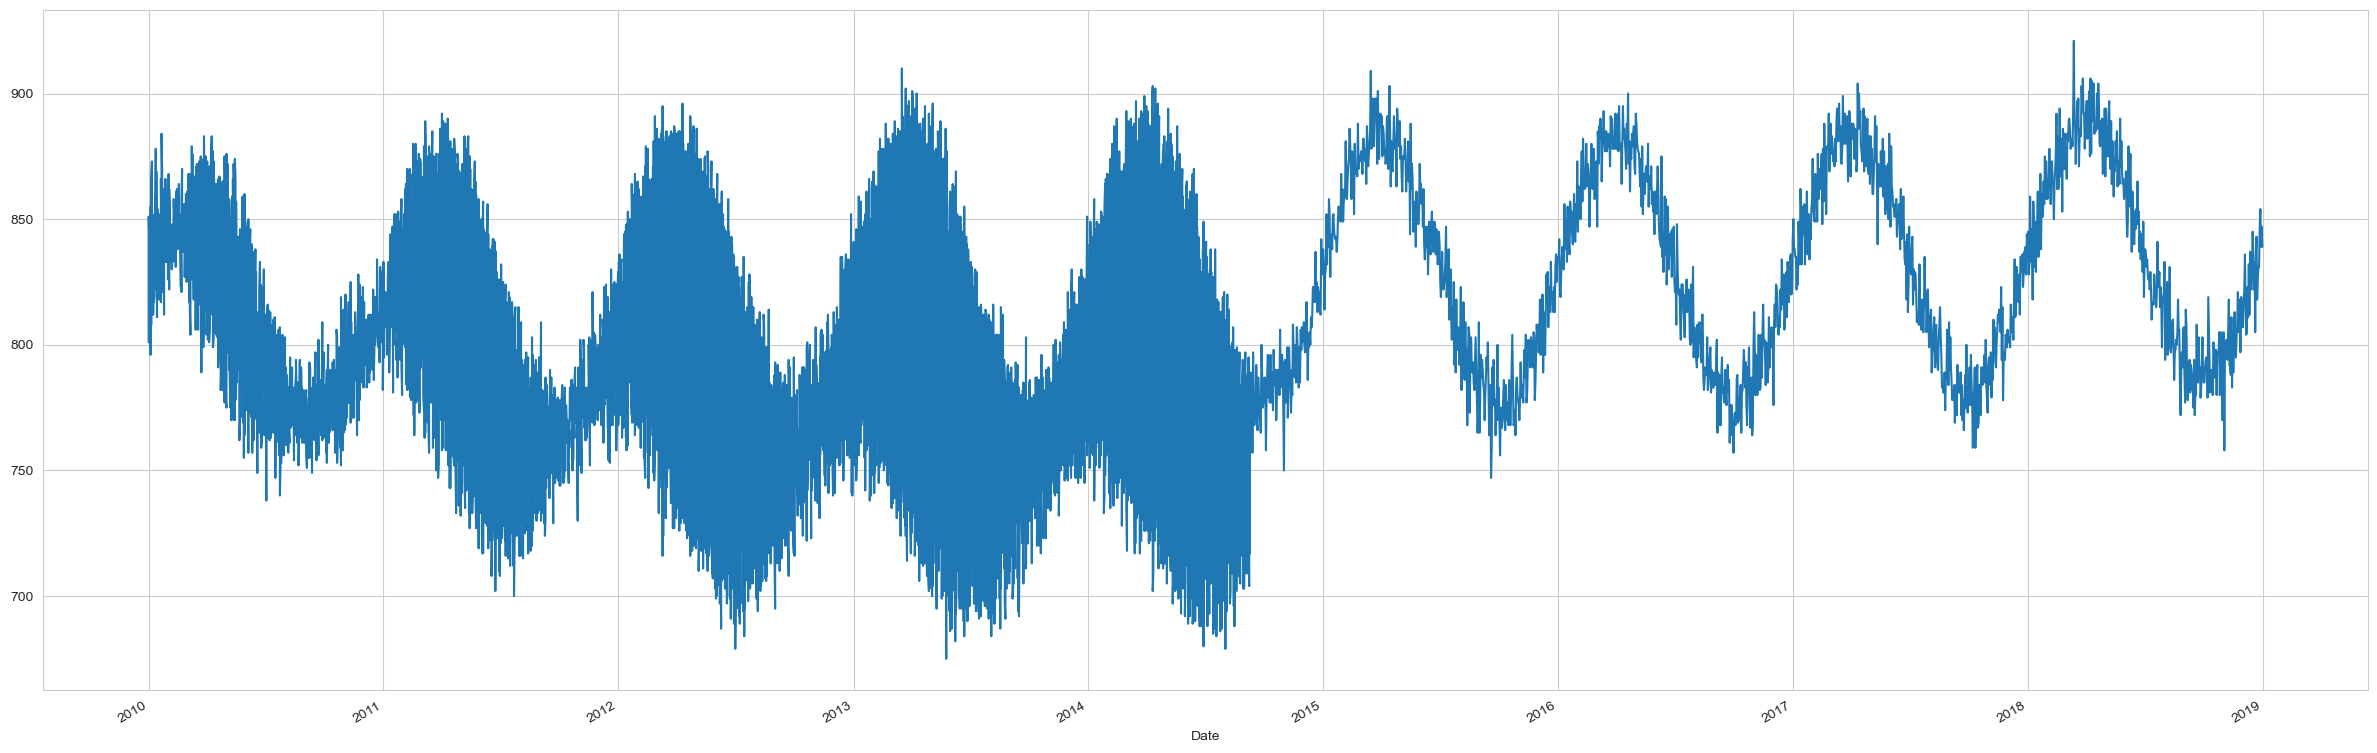

In [56]:
data[:5000].plot(figsize=(30, 10))

<AxesSubplot:xlabel='Date'>

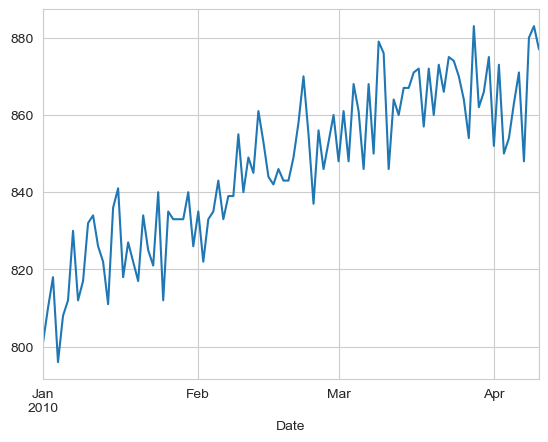

In [51]:
data[:100].plot()

* From the above data we can see that the timeseries looks mostly stationary.
* Also there has been a dip in the sales after October 2015.
* We will still use the Dickey-Fuller test to check the stationarity.

## Stationarity using Dickey-Fuller test

In [52]:
from statsmodels.tsa.stattools import adfuller
df_test = adfuller(data, autolag='AIC')

In [53]:
df_test

(-6.516349804844697,
 1.068956421614335e-08,
 84,
 230005,
 {'1%': -3.430378431438371,
  '5%': -2.8615525663285974,
  '10%': -2.5667766886033467},
 1777707.7105098455)

In [54]:
print('ADF Statistic: %f' % df_test[0])

print('p-value: %f' % df_test[1])

print('Critical Values:')

for key, value in df_test[4].items():
    print('\t%s: %.3f' % (key, value))
if df_test[0] < df_test[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -6.516350
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


* Here we can see that the test was closer.
* The p value also was less than 0.05.

## Partial Autocorrelation function

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


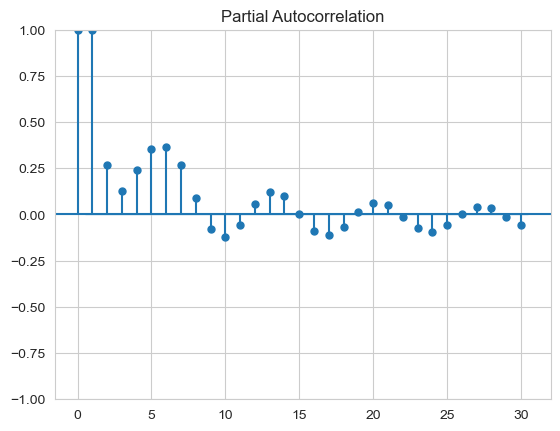

In [57]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data, lags=30)

* Here we can see that the first 25 points offer a decent suto correlation.

## AR Model

In [37]:
from statsmodels.tsa.ar_model import AutoReg

In [38]:
train = sold_count

In [39]:
data_test = pd.read_csv("Datasets/Time Series practice dataset/test.csv", index_col=0, parse_dates=True)
data_test.head()

,store,product,number_sold
Date,,,
2019-01-01,0,0,845
2019-01-02,0,0,851
2019-01-03,0,0,840
2019-01-04,0,0,842
2019-01-05,0,0,845


In [40]:
data_test = data_test['number_sold']

In [41]:
data_test.shape

(25550,)

In [42]:
test = data_test.values
test

array([845, 851, 840, ..., 913, 899, 886], dtype=int64)

In [58]:
ar_model = AutoReg(train, lags=25).fit()

In [59]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                25550
Model:                    AutoReg(25)   Log Likelihood             -106451.445
Method:               Conditional MLE   S.D. of innovations             15.667
Date:                Thu, 16 Mar 2023   AIC                         212956.890
Time:                        11:35:18   BIC                         213176.870
Sample:                            25   HQIC                        213028.020
                                25550                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3018      0.381      3.420      0.001       0.556       2.048
y.L1           0.6140      0.006     98.112      0.000       0.602       0.626
y.L2           0.1952      0.007     26.600      0.0

* Now making predictions for the test data.

In [60]:
pred = ar_model.predict(start=0, end=len(test)-1, dynamic=False)

The predicted values are:  [         nan          nan          nan ... 914.70965995 903.75969219
 892.25136679]


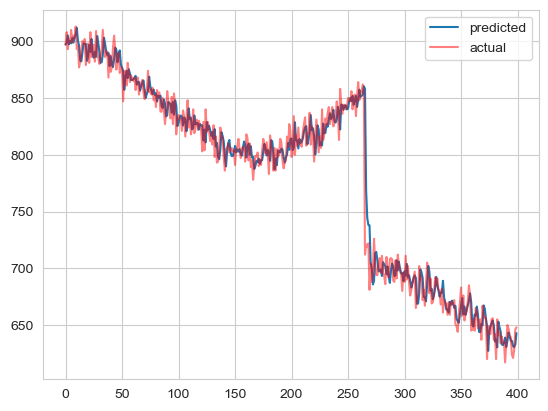

In [65]:
plt.plot(pred[100:500], label="predicted")
plt.plot(test[100:500], color='red', label="actual", alpha=0.5)
plt.legend()
print("The predicted values are: " ,pred)

* As we can see here the predictions were quite accurate.

* Now we can make future predictions.

In [67]:
pred_future = ar_model.predict(start=len(test)+1, end=len(test)+30, dynamic=False)
print("The predicted values of the next 30 days is: " ,pred_future)

The predicted values of the next 30 days is:  [893.73999872 902.90414354 908.5290815  905.71508101 896.77142238
 887.06254863 884.20950581 891.20439227 901.73013057 908.68785011
 906.76945678 897.04446037 887.67253917 884.14497842 890.098305
 899.70274618 905.48809066 904.32489225 895.65306092 887.34792825
 885.70345102 890.57529074 898.41411562 903.25743609 901.6757382
 894.8483902  887.80535504 885.69227622 889.90617471 897.08024211]


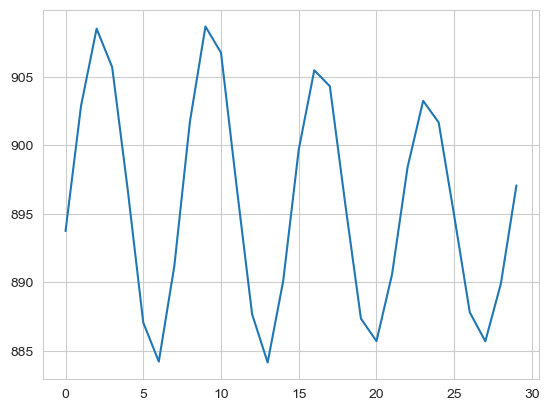

In [69]:
plt.plot(pred_future)